In [10]:
# customize nodes' position refering to Gyeongsang province map..
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np

In [2]:
gTraffSorted = pd.read_csv('gTraffSorted.csv', encoding='utf-8') # stored as df
gTraffSorted.head()

,지명,0
0,합천군,2798.75
1,함양군,5001.25
2,산청군,5538.00
3,거창군,7223.75
4,창녕군,8540.25


In [4]:
gTraffSorted = gTraffSorted.rename(columns={'지명':'name','0':'totalTraff'})
gTraffSorted

,name,totalTraff
0,합천군,2798.75
1,함양군,5001.25
2,산청군,5538.00
3,거창군,7223.75
4,창녕군,8540.25
5,하동군,9267.25
6,고성군,12907.75
7,통영시,15509.25
8,사천시,18993.00
9,진주시,31413.50


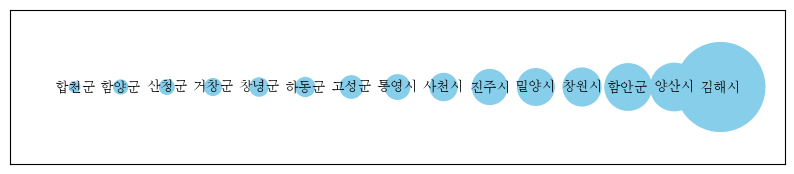

In [8]:
# from the previous work
imgBg = plt.imread('경상남도지도.png')
fig, axs = plt.subplots(1,1, figsize=(10,2))
G = nx.Graph()
G.add_nodes_from(gTraffSorted['name'])
pos = {val: (idx, 0) for idx, val in enumerate(gTraffSorted['name'])}
nx.draw_networkx(G, with_labels=True, pos=pos, ax=axs, node_size=gTraffSorted['totalTraff']/50, font_family='Batang', node_color='skyblue', font_size=10)
plt.margins(0.1,0)
plt.show()
# fig.savefig('nodesWithSizeGyeongsang.png')

In [12]:
# add font - my choice is Binggrea font! :D
import matplotlib.font_manager as fm
# fm.fontManager.addfont('BinggraeII-Bold.ttf')
fm.fontManager.addfont('BinggraeII.ttf')
# need to check the name set by the system
sorted(fm.get_font_names())[:30]

['Agency FB',
 'Algerian',
 'Ami R',
 'Arial',
 'Arial Rounded MT Bold',
 'Bahnschrift',
 'Baskerville Old Face',
 'Batang',
 'Bauhaus 93',
 'Bell MT',
 'Berlin Sans FB',
 'Berlin Sans FB Demi',
 'Bernard MT Condensed',
 'Binggrae?',
 'Blackadder ITC',
 'Bodoni MT',
 'Book Antiqua',
 'Bookman Old Style',
 'Bookshelf Symbol 7',
 'Bradley Hand ITC',
 'Britannic Bold',
 'Broadway',
 'Brush Script MT',
 'Calibri',
 'Californian FB',
 'Calisto MT',
 'Cambria',
 'Candara',
 'Castellar',
 'Centaur']

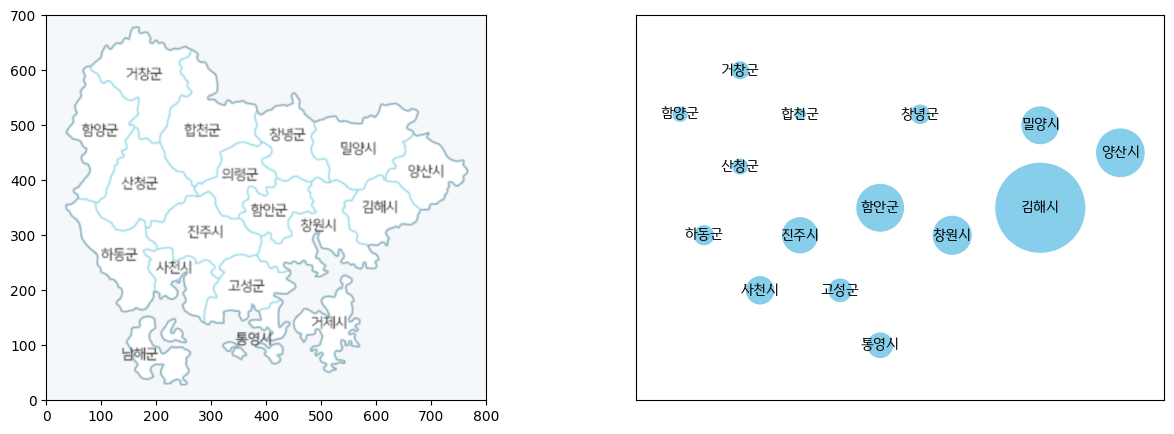

In [13]:
# plot the map and the graph in a row
fig, ax = plt.subplots(1,2,sharex='col',sharey='row',figsize=(15,5))
ax[0].imshow(imgBg, extent=[0, 800, 0, 700])

# network
G = nx.Graph()
G.add_nodes_from(gTraffSorted['name'])
# missingNode = np.array(['의령군','남해군','거제시'])
# adjust nodes' position
pos = {'합천군':(300,520),'함양군':(150,520),'산청군':(225,425),'거창군':(225,600),'창녕군':(450,520),'하동군':(180,300)
      ,'고성군':(350,200),'통영시':(400,100),'사천시':(250,200),'진주시':(300,300),'밀양시':(600,500),'창원시':(490,300)
      ,'함안군':(400,350),'양산시':(700,450),'김해시':(600,350)}
# update for the missing nodes
# pos.update({'의령군':(350,400),'남해군':(200,100),'거제시':(500,100)})
sizeArr = np.concatenate([gTraffSorted['totalTraff']/50, np.ones(3)*30])

nx.draw_networkx(G, with_labels=True, ax=ax[1], pos=pos, font_size=10, node_size=gTraffSorted['totalTraff']/50, node_color='skyblue', font_family='Binggrae?')
plt.margins(0.1,0.1)
plt.show()

# fig.savefig('경상남도노드.png')

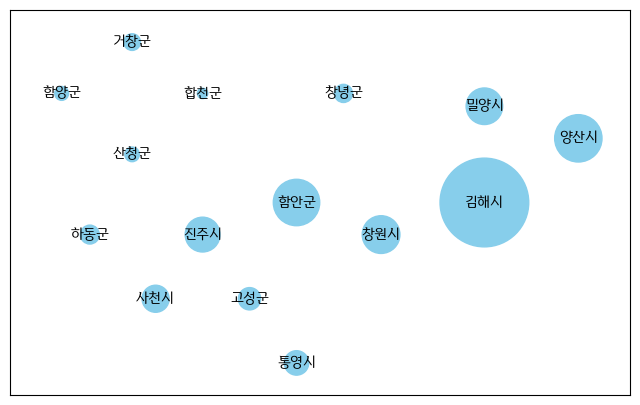

In [16]:
# after finding the right position, separate the network
fig, ax = plt.subplots(1,1,figsize=(8,5))
G = nx.Graph()
G.add_nodes_from(gTraffSorted['name'])
pos = {'합천군':(300,520),'함양군':(150,520),'산청군':(225,425),'거창군':(225,600),'창녕군':(450,520),'하동군':(180,300)
      ,'고성군':(350,200),'통영시':(400,100),'사천시':(250,200),'진주시':(300,300),'밀양시':(600,500),'창원시':(490,300)
      ,'함안군':(400,350),'양산시':(700,450),'김해시':(600,350)}
nx.draw_networkx(G, with_labels=True, ax=ax, pos=pos, font_size=10, node_size=gTraffSorted['totalTraff']/50, node_color='skyblue', font_family='Binggrae?')
figsize=(15,5)
plt.margins(0.1,0.1)
plt.show()

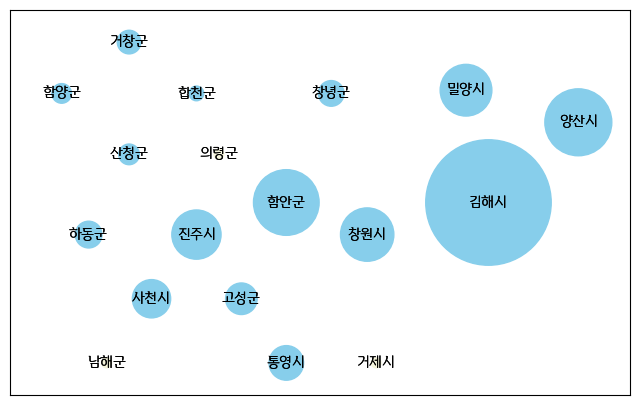

In [32]:
# add missing nodes 의령군, 남해군, and 거제시
fig, ax = plt.subplots(1,1,figsize=(8,5))
G = nx.Graph()
G.add_nodes_from(gTraffSorted['name'])
missingNode = np.array(['의령군','남해군','거제시'])
G.add_nodes_from(missingNode)
pos = {'합천군':(300,520),'함양군':(150,520),'산청군':(225,425),'거창군':(225,600),'창녕군':(450,520),'하동군':(180,300)
      ,'고성군':(350,200),'통영시':(400,100),'사천시':(250,200),'진주시':(300,300),'밀양시':(600,525),'창원시':(490,300)
      ,'함안군':(400,350),'양산시':(725,475),'김해시':(625,350)}
pos.update({'의령군':(325,425),'남해군':(200,100),'거제시':(500,100)})
nx.draw_networkx(G, with_labels=True, ax=ax, pos=pos, nodelist=gTraffSorted['name'], font_size=10, node_size=gTraffSorted['totalTraff']/25, node_color='skyblue', font_family='Binggrae?')
nx.draw_networkx(G, with_labels=True, ax=ax, pos=pos, nodelist=missingNode, font_size=10, node_size=np.ones(3)*50, node_color='beige', font_family='Binggrae?')
plt.margins(0.1,0.1)
plt.show()
fig.savefig('경상남도노드3.png')

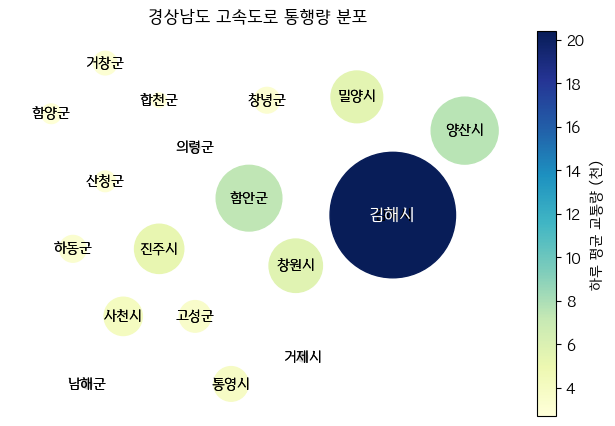

In [140]:
# color nodes according to their total traffic with matplotlib cmap
import matplotlib as mpl

cmap = plt.cm.YlGnBu
fig, ax = plt.subplots(1,1,figsize=(8,5))
mpl.rcParams["font.family"] = 'Binggrae?'
G = nx.Graph()
G.add_nodes_from(gTraffSorted['name'])
missingNode = ['의령군','남해군','거제시']
G.add_nodes_from(missingNode)
pos = {'합천군':(300,520),'함양군':(150,500),'산청군':(225,400),'거창군':(225,575),'창녕군':(450,520),'하동군':(180,300)
      ,'고성군':(350,200),'통영시':(400,100),'사천시':(250,200),'진주시':(300,300),'밀양시':(575,525),'창원시':(490,275)
      ,'함안군':(425,375),'양산시':(725,475),'김해시':(625,350)}
pos.update({'의령군':(350,450),'남해군':(200,100),'거제시':(500,140)})
nx.draw_networkx(G, with_labels=True, ax=ax, pos=pos, nodelist=gTraffSorted['name'], font_size=10, node_size=gTraffSorted['totalTraff']/25, node_color=gTraffSorted['totalTraff']/25, cmap=cmap, font_family='Binggrae?')
nx.draw_networkx(G, with_labels=True, ax=ax, pos=pos, nodelist=missingNode, font_size=10, node_size=np.ones(3)*50, node_color='lightgray', font_family='Binggrae?')
# add color bar
norm = mpl.colors.Normalize(vmin=2.7, vmax=20.4)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax, orientation='vertical', label='하루 평균 교통량 (천)')
# Title/legend
font = {"fontname": "Binggrae?", "color": "white", "fontsize": 12, "fontweight": "extra bold"}
ax.text(
    0.77,
    0.51,
    "김해시",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
plt.title('경상남도 고속도로 통행량 분포')
plt.margins(0.1,0.1)
plt.show()
# fig.savefig('경상남도노드4.png')

In [ ]:
# 고속도로의 특성상, 경상남도->부산으로 넘어가는 길목이 되는 김해의 교통량이 압도적으로 높게 잡힌듯.
# 이를통해 경상남도는 다른 도들보다 특별히 부산광역시와 가장 긴밀하게 이어져있는 것을 알 수 있음
# 고속도로 교통량으로는 경상남도내 시/군간의 연결성을 파악하는데에 한계가 있음. 국토교통부가 공개한 도로현황에 따르면
# 고속도로의 비율은 꽤나 낮음. 국도, 지방도, 시도, 군도 통행량 분석이 필요함.

In [ ]:
# end of code